# ANN

In [26]:
import numpy as np
import pandas as pd
import plot_learning_curve as plotlearn
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [12]:
# Carrega os dados
data = pd.read_csv("DSL-StrongPasswordData.csv", header = 0)
# Reinicia o index
data = data.reset_index()
# Pega os IDs unicos campo 'subject'
unisub = list(data['subject'].unique())
# Cria ID numerico sequencial
mlist = [int(x) for x in range(len(unisub))]
# Vincula o Id numerico com o campo 'subject'
newvalue = dict(zip(unisub, mlist))
data['subject'] = data['subject'].map(newvalue)

# Seleciona Freatures
features = list(data.columns[2:])

X = data[features]
y = data['subject']

In [13]:
# Divide o conjunto de dados utilizando a proporção 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,random_state=42)

In [14]:
#Pre processa os dados
scaler = StandardScaler()
scaler.fit(X_train)

scaler.transform(X_train)
scaler.transform(X_test)

array([[ 0.65629302,  0.52267595,  1.75794114, ..., -0.21079328,
        -0.50536119,  1.8930323 ],
       [-0.21580746,  0.87016701, -0.09628472, ..., -0.36634048,
        -0.3541073 , -0.3925109 ],
       [ 0.65629302, -0.3808008 , -0.88272055, ..., -0.60100994,
        -0.56104016, -0.58632496],
       ..., 
       [ 0.22024278, -0.86728828,  0.18167967, ..., -0.33307316,
        -0.23485785,  0.30960797],
       [-0.21580746, -0.03330974, -0.33018158, ...,  1.44088411,
         1.4837371 , -0.67408982],
       [ 1.52839349, -1.28427755, -0.04882738, ..., -0.51469473,
        -0.51939054, -0.28646169]])

In [15]:
net = MLPClassifier(random_state=42,hidden_layer_sizes=(84, ),max_iter=600,activation= 'relu', learning_rate= 'invscaling', solver='adam')

In [16]:
net.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(84,), learning_rate='invscaling',
       learning_rate_init=0.001, max_iter=600, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [17]:
# predict the output using the test data on the learned model
predicted_output = net.predict(X_test)

In [18]:
model_accuracy = metrics.accuracy_score(y_test, predicted_output)
print('Acurácia do modelo:',model_accuracy)

Acurácia do modelo: 0.920833333333


In [10]:
print(classification_report(y_test, predicted_output, target_names=unisub))

             precision    recall  f1-score   support

       s002       0.85      0.88      0.86        72
       s003       0.86      0.91      0.89        69
       s004       0.96      0.92      0.94        73
       s005       0.96      0.96      0.96        73
       s007       0.89      0.74      0.81        54
       s008       0.89      0.89      0.89        87
       s010       0.99      0.96      0.97        97
       s011       0.85      0.92      0.88        75
       s012       0.91      0.91      0.91        93
       s013       0.96      0.93      0.94        72
       s015       0.92      0.94      0.93        87
       s016       0.95      0.93      0.94        85
       s017       0.95      0.98      0.96        82
       s018       0.89      0.88      0.88        73
       s019       1.00      0.99      0.99        80
       s020       0.78      0.87      0.82        86
       s021       0.87      0.95      0.91        86
       s022       0.99      0.99      0.99   

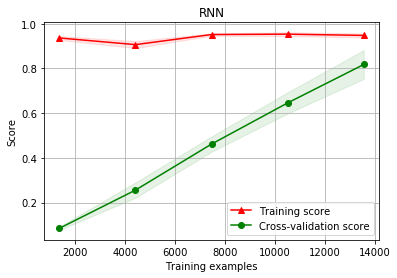

In [19]:
title = "RNN"
plotlearn.plot_learning_curve(net, title, X, y)

plt.show()

In [20]:
plotlearn.plot_confusion_matrix

AttributeError: module 'plot_learning_curve' has no attribute 'plot_confusion_matrix'

In [29]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
   # for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    #    plt.text(j, i, format(cm[i, j], fmt),
     #            horizontalalignment="center",
      #           color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [30]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predicted_output)
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[63  0  0 ...,  0  0  0]
 [ 0 63  0 ...,  0  0  0]
 [ 2  2 67 ...,  0  0  0]
 ..., 
 [ 0  0  0 ..., 64  0  0]
 [ 1  1  0 ...,  0 77  2]
 [ 0  0  0 ...,  0  1 83]]


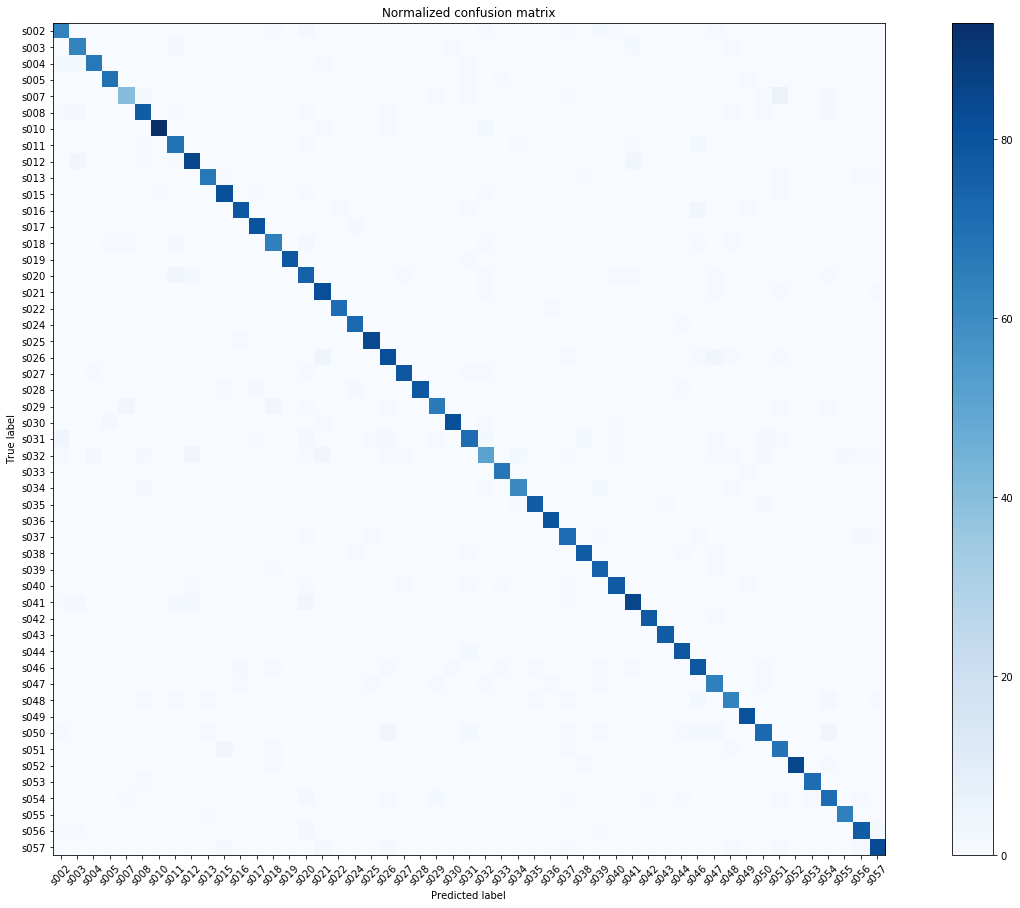

In [32]:
# Plot normalized confusion matrix
#plt.figure()
plt.figure(figsize=(6*3.13,4*3.13)) 
plot_confusion_matrix(cnf_matrix, classes=unisub, normalize=False,
                      title='Normalized confusion matrix')

plt.show()
